In [166]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing train_test_split
from sklearn.model_selection import train_test_split

In [167]:
df = pd.read_csv('shirt_data.csv')
df

,Height,Weight,Size
0,1.58,58.00,m
1,1.59,59.00,m
2,1.58,63.00,m
3,1.60,59.00,m
4,1.60,60.00,m
...,...,...,...
150,2.01,74.84,l
151,1.90,72.58,l
152,1.80,77.11,l
153,1.65,53.07,s


In [168]:
#Marketing expense	Production expense	Multiplex coverage	Budget	Movie_length	Lead_ Actor_Rating	Lead_Actress_rating	Director_rating	Producer_rating	Critic_rating	Trailer_views	3D_available	Time_taken	Twitter_hastags	Genre	Avg_age_actors	Num_multiplex	Collection	
df["Size"] = df["Size"].replace({'s':1, 'm':1,'l':2})

y = df['Size'].values
X = df[['Height', 'Weight']].values

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [170]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

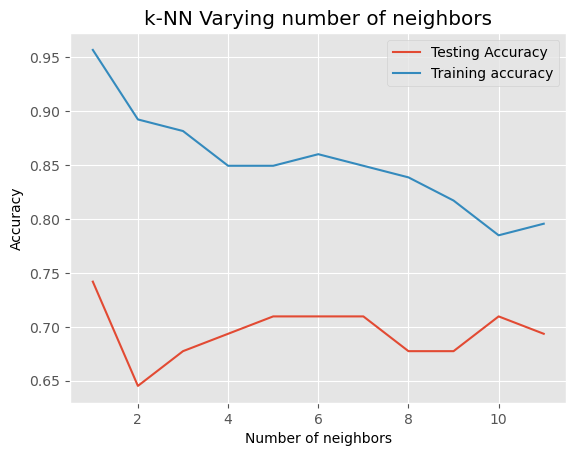

In [171]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [172]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=10)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7096774193548387

In [173]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

# true negative=8,, false positive = 11, true psoitive = 20, flase negatove = 9

array([[22, 11],
       [ 7, 22]], dtype=int64)

In [174]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,All
True,,,
1,22,11,33
2,7,22,29
All,29,33,62


In [175]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.76      0.67      0.71        33
           2       0.67      0.76      0.71        29

    accuracy                           0.71        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.72      0.71      0.71        62



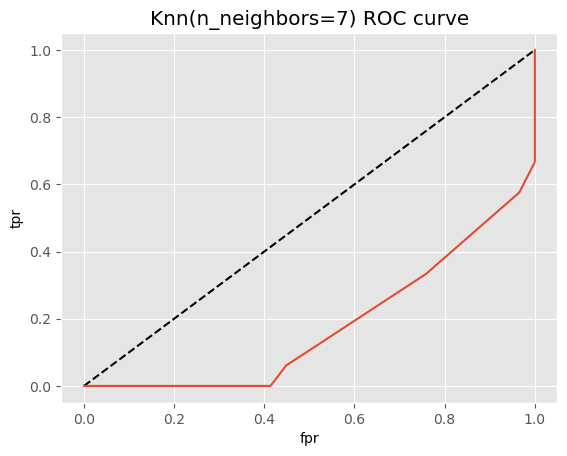

In [176]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [177]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8223615464994776

In [178]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [179]:
knn_cv.best_score_

0.7483870967741936

In [180]:
knn_cv.best_params_

{'n_neighbors': 10}

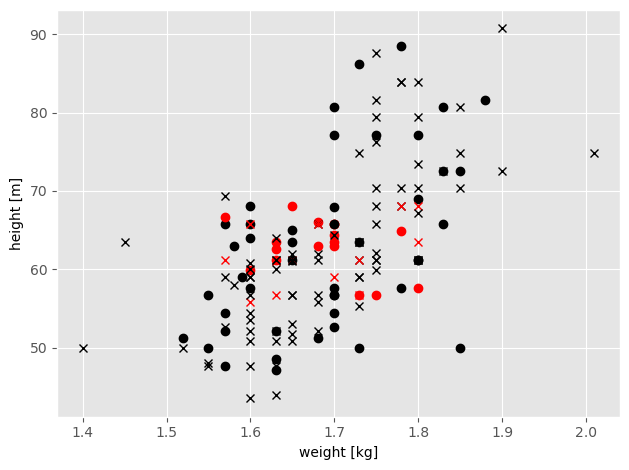

In [181]:
plt.figure()

for i in range(0,len(y_test)):
    if y_test[i] == knn_cv.predict(X_test)[i]:
        plt.plot(X_test[i,0], X_test[i,1],'ko')
    else:
        plt.plot(X_test[i,0], X_test[i,1],'ro')
                
for i in range(0,len(y_train)):
    if y_train[i] == knn_cv.predict(X_train)[i]:
        plt.plot(X_train[i,0], X_train[i,1],'kx')
    else:
        plt.plot(X_train[i,0], X_train[i,1],'rx')

plt.xlabel('weight [kg]', fontsize=10); plt.ylabel('height [m]', fontsize=10)                 
plt.tight_layout()
plt.show()

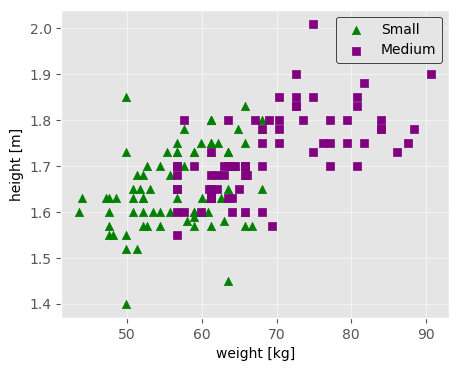

In [182]:
# Plot figure
plt.figure(figsize=(5,4), dpi=100)
mkr_dict = {1 : '^', 2: 's'}
col_dict = {1: 'green', 2: 'purple'}
lab_dict = {1: 'Small', 2: 'Medium'}

for kind in mkr_dict:
    d = df[df['Size']==kind]
    plt.scatter(d['Weight'], d['Height'], 
                c=col_dict[kind],
               marker = mkr_dict[kind],
               label=lab_dict[kind])
    
plt.grid(alpha=0.5)
#plt.xlim([57,69]); plt.ylim([1.57,1.71])
plt.xlabel('weight [kg]', fontsize=10); plt.ylabel('height [m]', fontsize=10)
plt.legend(framealpha=1, edgecolor='k', fontsize = 10)
plt.show()


In [183]:
knn_cv.predict(X_test)[1]

2